## Tutorial - Iris Dataset - Learning to Identify Species of Iris Flowers

### Installing Libraries

In [0]:
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn

### Downloading the Dataset

In [0]:
! if [ ! -f iris.csv ]; then wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv; fi

### Reading the Dataset

In [0]:
import pandas as pd # data processing
import seaborn as sns # data visualization

# Read the data and visualize some samples
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Exploratory Data Analysis

In [0]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
df.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

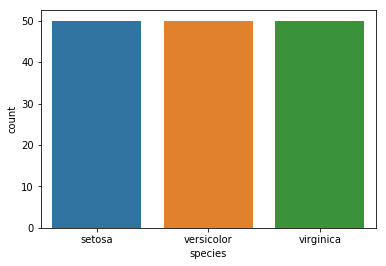

In [0]:
sns.countplot(x='species', data=df)

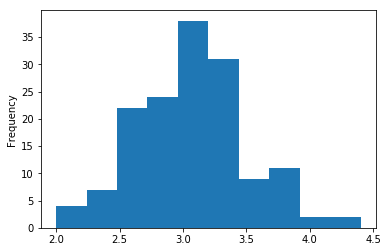

In [0]:
df['sepal_width'].plot.hist()

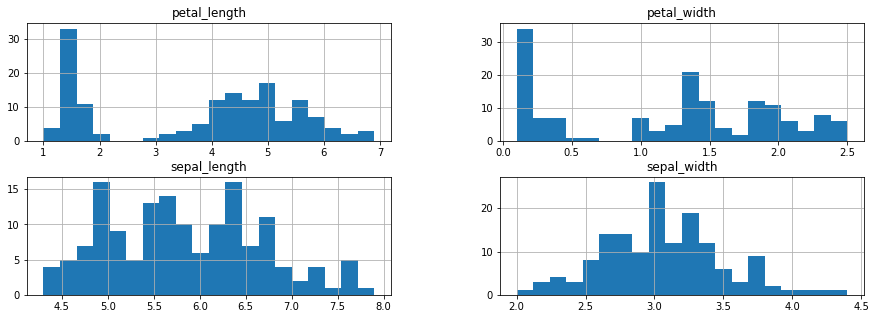

In [0]:
all_hists = df.hist(bins=20, figsize=(15,5))

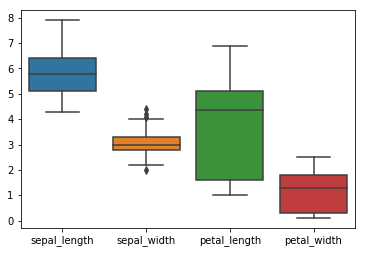

In [0]:
sns.boxplot(data=df)

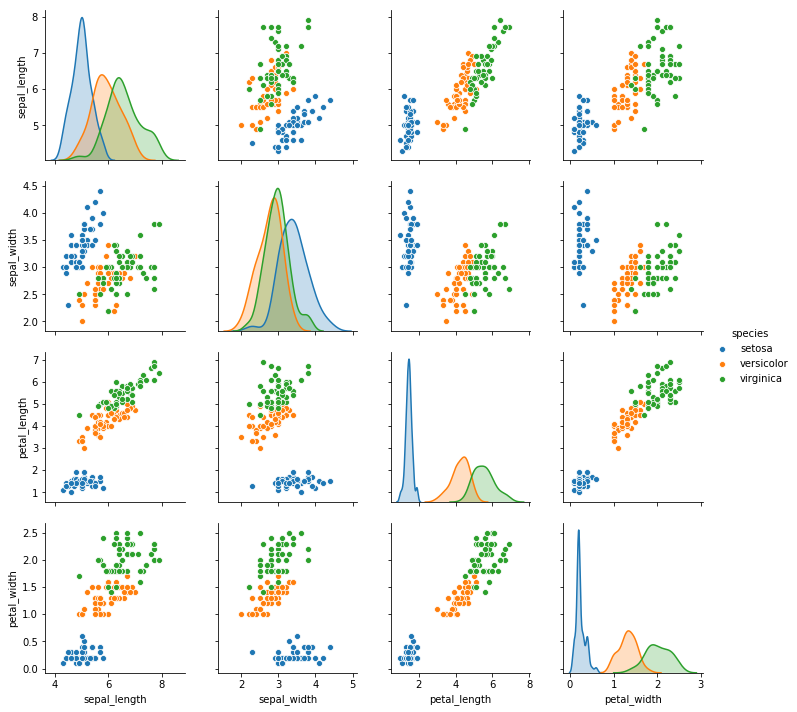

In [0]:
sns.pairplot(df, hue='species')

### Preparing the Data for Supervised Learning

In [0]:
# Separate features and target variables
df_features = df.drop('species', axis=1)
df_target = df['species']

In [0]:
df_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
df_target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_target, test_size=0.10)

### Building the first machine learning pipeline

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Create our first machine learning pipeline
pipeline_list = []
pipeline_list.append(('preprocessing', MinMaxScaler()))
pipeline_list.append(('feature_selection', SelectKBest(k=3)))
pipeline_list.append(('classifier', LogisticRegression()))

ml_pipeline = Pipeline(pipeline_list)
ml_pipeline.fit(X_train, Y_train)
predictions = ml_pipeline.predict(X_test)
test_acc = accuracy_score(predictions, Y_test)
print("Accuracy on the test set", test_acc)

Accuracy on the test set 0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Building Multiple Machine Learning Hypothesis

Para esse exercício reutilizaremos a pipeline criada na célula de execução anterior, denominada *ml_pipeline*.

1. Crie uma lista contendo os classificadores LogisticRegression, KNN, Perceptron, Naive Bayes, Linear SVC, Decision Tree, Random Forest and Gradient Boosting instanciados. Esses classificadores já são importados na célular anterior, lembre-se de executá-la. Exemplo abaixo.

> `classifiers = [ClassifierName1(), ClassifierName2()]`

2. Use a classe StratifiedKFold para instanciar um objeto denominado *kfold* com o parâmetro *n_splits=10*. Exemplo de instanciação de objeto abaixo.

> `object_name = ClassName(parameter=value)`

3.  Utilize uma estrutura de repetição *for* para iterar sobre a lista de classificadores criada no passo 1. 

> 3.1 Dentro do bloco *for*, utilize a pipeline da célula anterior (*ml_pipeline*) e a atualize com o classificador obtido na iteração corrente. A atualização pode ser realizada com o método .set_params(). 
Exemplo abaixo:

> `ml_pipeline.set_params(classifier=current_classifier)`


> 3.2 Ainda dentro do bloco *for*, chame a função denominada *cross_val_score* (importada na célula anterior) e passe como argumentos a *ml_pipeline*, *X_train*, *Y_train*, a estratégia de validação cruzada criada no passo 2 como parâmetro *cv* e por fim defina o argumento *scoring* como "accuracy". Ao chamar a função, armazene o seu retorno em uma nova variável chamada *cv_results*, esta variável deve conter uma lista com as acurácias computadas para cada um dos dez folds.

> 3.3 Exiba o nome do classificador, bem como a média das acurácias contidas na variável cv_results.
Example abaixo:
 ```
print(str(classifier))
print(cv_results.mean())
```


4. Observe o classificador que gerou o melhor resultado na etapa 3. Utilize novamente o método *.set_params()* para atualizar o classificador da *ml_pipeline* com o melhor classificador observado. Utilize o método *.fit()* para alimentar o classificador com X_train e Y_train. Finalmente, armazene em uma variável o resultado da chamada do método *.predict()* passando como argumento a variável *X_test*. Com essa variável, utilize os métodos accuracy_score() e confusion_matrix() a passando como argumento, junto da variável *Y_test* (Ex.: * acc = accuracy_score(predictions, Y_test)*). Utilize o método *print()* para exibir a acurácia e matrix de confusão.

In [0]:
# 1. Create a python list containing the classifiers
hypothesis_models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    Perceptron(),
    GaussianNB(),
    LinearSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]


# 2. Uses the class StratifiedKFold to instanciate an object with n_splits=10
kfold = StratifiedKFold(n_splits=10, random_state=42)

# 3. Iterate over the list created in step 1 
for classifier in hypothesis_models:
  ml_pipeline.set_params(classifier=classifier)
  cv_results = cross_val_score(ml_pipeline, X_train, Y_train, cv=kfold, scoring="accuracy")
  print("--------------")
  print(str(classifier))
  print(cv_results.mean())
  
# 4. Create a new pipeline with the best algorithm found previously
ml_pipeline.set_params(classifier=KNeighborsClassifier())
ml_pipeline.fit(X_train, Y_train)
predictions = ml_pipeline.predict(X_test)
test_acc = accuracy_score(predictions, Y_test)
print("Final accuracy on the test set", test_acc)
print("Confusion matrix", confusion_matrix(predictions, Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

--------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.809084249084249
--------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
0.9563553113553113
--------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
0.7444139194139193
--------------
GaussianNB(priors=None, var_smoothing=1e-09)
0.9563553113553113
--------------
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

--------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9326373626373625
--------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose

### Hyperparameter Optimization

In [0]:
from sklearn.model_selection import GridSearchCV

pipeline_list = []
pipeline_list.append(('preprocessing', MinMaxScaler()))
pipeline_list.append(('feature_selection', SelectKBest(k=3)))
pipeline_list.append(('classifier', KNeighborsClassifier()))

pipeline_knn = Pipeline(pipeline_list)


grid_params_knn = [
    {
      'classifier__n_neighbors': [3, 5, 7],
    }
] 

grid_knn = GridSearchCV(estimator=pipeline_knn,
			                   param_grid=grid_params_knn,
			                   scoring='accuracy',
			                   cv=10) 


grid_knn.fit(X_train, Y_train)
print(grid_knn.best_params_)
best_classifier = grid_knn.best_estimator_


# Create a new pipeline with the best algorithm found previously
best_classifier.fit(X_train, Y_train)
predictions = best_classifier.predict(X_test)
test_acc = accuracy_score(predictions, Y_test)
print("Final accuracy on the test set", test_acc)

{'classifier__n_neighbors': 3}
Final accuracy on the test set 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
